# Problema 8.10

Trazar el lugar de las raices para el control proporcional de un sistema de tres etapas con constantes de tiempo 1, 0.5 y 0.25 min, ganancia de proceso $K_p=1$ y medidor $H=1$. Determinar la estabilidad para los valores de $K_c$ siguientes: 0.1, 10 y 15. ¿Qué valores tendrán el margen de ganancia y de fase para cada uno de esos tres casos?

---

**Solución**

**Gráfico del lugar de las raíces**

El lazo de control propuesto es:

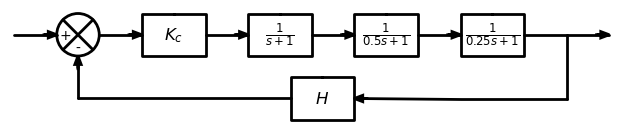

In [1]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")

d = schemdraw.Drawing(unit=1, fontsize=12)

d.add(dsp.Arrow().right())
comp = d.add(dsp.Mixer(W="+", S="-").anchor("W"))
d.add(dsp.Arrow().at(comp.E).right())
control = d.add(dsp.Box(h=1, w=1.5).label(L"K_c").anchor("W"))
d.add(dsp.Arrow().right().at(control.E))
proc1 = d.add(dsp.Box(h=1, w=1.5).label(L"\frac{1}{s+1}").anchor("W"))
d.add(dsp.Arrow().right().at(proc1.E))
proc2 = d.add(dsp.Box(h=1, w=1.5).label(L"\frac{1}{0.5s+1}").anchor("W"))
d.add(dsp.Arrow().right().at(proc2.E))
proc3 = d.add(dsp.Box(h=1, w=1.5).label(L"\frac{1}{0.25s+1}").anchor("W"))
d.add(dsp.Line().at(proc3.E).right())
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().at(dot.center))
d.pop()
d.add(dsp.Line().down().at(dot.center).length(1.5))
d.add(dsp.Arrow().left().length(5))
sensor = d.add(dsp.Box(h=1, w=1.5).label(L"H").anchor("E"))
d.add(dsp.Line().at(sensor.W).tox(comp.S).left())
d.add(dsp.Arrow().up().to(comp.S))

d.draw(show=false)

Por tanto, su ecuación característica es:

$$1 + K_c  \frac{1}{s + 1}  \frac{1}{0.5 s + 1}  \frac{1}{0.25 s + 1} = 0$$

Operando se encuentra:

$$0.125 s^3 + 0.875 s^2 + 1.75 s + 1 + K_c = 0$$

Para dibujar el lugar de las raíces hay que encontrar las raíces de la ecuación anterior para diferentes valores de $K_c$ y representarlas en el plano complejo.

Empezaremos cargando las librería necesarias y creando las variables que utilizaremos:

In [2]:
using SymPy, Plots
#plotly()

@vars s
t, Kc = symbols("t K_c", real=true)

(t, K_c)

Tal como se indicaba más arriba, la función de lazo abierto es:

In [3]:
Gol_s = Kc*1/(s+1)*1/(.5s+1)*1/(.25s+1)

              K_c               
────────────────────────────────
(0.25⋅s + 1)⋅(0.5⋅s + 1)⋅(s + 1)

Las raíces de la ecuación característica en función de $K_c$, un polinomio de trecer grado tiene solución analítica:

In [4]:
rl = solve(1+Gol_s, s)

3-element Vector{Sym}:
 -1.5874010519682*(-0.5 - 0.866025403784439*I)*(K_c + ((K_c + 0.0925925925925926)^2 - 0.0294067215363512)^0.5 + 0.0925925925925926)^(1/3) - 2.33333333333333 - 0.48996929718134*(-0.5 + 0.866025403784439*I)/(K_c + ((K_c + 0.0925925925925926)^2 - 0.0294067215363512)^0.5 + 0.0925925925925926)^(1/3)
 -1.5874010519682*(-0.5 + 0.866025403784439*I)*(K_c + ((K_c + 0.0925925925925926)^2 - 0.0294067215363512)^0.5 + 0.0925925925925926)^(1/3) - 2.33333333333333 - 0.48996929718134*(-0.5 - 0.866025403784439*I)/(K_c + ((K_c + 0.0925925925925926)^2 - 0.0294067215363512)^0.5 + 0.0925925925925926)^(1/3)
                                                           -1.5874010519682*(K_c + ((K_c + 0.0925925925925926)^2 - 0.0294067215363512)^0.5 + 0.0925925925925926)^(1/3) - 2.33333333333333 - 0.48996929718134/(K_c + ((K_c + 0.0925925925925926)^2 - 0.0294067215363512)^0.5 + 0.0925925925925926)^(1/3)

Para poder trabajar con la función de una manera más sencilla, vamos a convertirla en una función de Julia:

In [5]:
raiz = lambdify(rl)

#103 (generic function with 1 method)

Comprobamos que funciona calculando las raíces para $Kc=3$:

In [6]:
raiz(3)

3-element Vector{Number}:
 -0.7432742592131494 + 2.2916217498187774im
 -0.7432742592131494 - 2.2916217498187774im
                    -5.513451481573702

Dibujaremos las raíces de la ecuación característica para valores de $K_c$ entre 0 y 20:

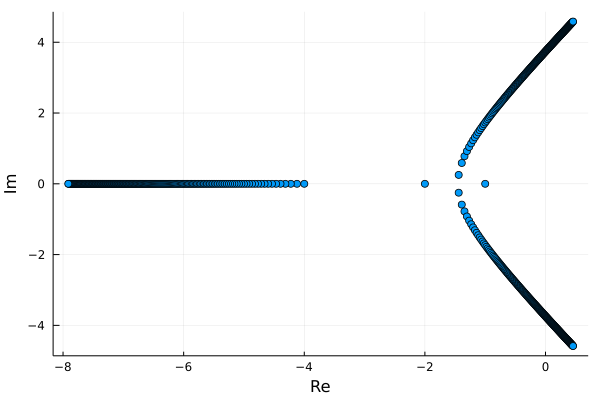

In [13]:
# Definimos los valores de Kc para los que representaremos el lugar
#de las raíces
K = range(0, 20, step=.1)
lreal = []
limag = []

# En este bucle, en primer lugar encontramos las raíces para
# cada valor de Kc
# En el segundo
for k in K
    root = raiz(Complex(k))
    for i in root
        push!(lreal, real(i))
        push!(limag, imag(i))
    end
end

scatter(lreal, limag, legend=false, xlabel="Re", ylabel="Im")

Dibujar el gráfico del lugar de las raíces no es complicado, pero sí es un poco laborioso. Una opción más simple, es utilizar la biblioteca `ControlSystems.jl`, que dibujar el lugar de las raíces utilizando métodos numéricos:

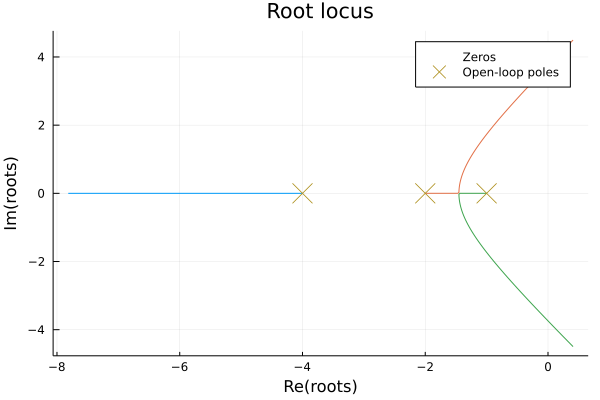

In [8]:
using ControlSystems

# Definimos la variable s
s = tf("s")

# Representación del lugar de las raíces para Gol para
# valores de Kc entre 0 y 20 
rlocus(1/(s+1)*1/(.5s+1)*1/(.25s+1), K=20)

Pasando el ratón sobre las curvas, se puede leer los valor de la raices y el valor de la ganancia del controlador:

![Valores de las raíces en función de Kc](./img/prob810.png)

**Estudio de estabilidad para los valores de $K_c$ siguientes: 0.01, 10 y 15**

Resolviendo la ecuación característica se puede construir la siguiente tabla:

In [30]:
using Markdown

Kcs = [0.01, 10, 15]

tabla = "| _Kc_ | raíces\n------|-------"

for kc in Kcs
    raices = raiz(kc+0im)
    for j in 1:3
        if j == 1
            kc_print = string(kc)
        else
            kc_print = ""
        end
        if real(raices[j]) > 0
            negrita = "**"
        else
            negrita = ""
        end
        tabla = tabla* "\n| " * kc_print * " | "* negrita * string(round(raices[j], digits=3)) * negrita
    end
end
#tabla = tabla * "\""
println(Markdown.parse(tabla))

| *Kc* |              raíces |
| ----:| -------------------:|
| 0.01 |      -1.959 - 0.0im |
|      |      -1.028 + 0.0im |
|      |      -4.013 + 0.0im |
| 10.0 |    -0.082 + 3.587im |
|      |    -0.082 - 3.587im |
|      |      -6.835 + 0.0im |
| 15.0 | **0.217 + 4.144im** |
|      | **0.217 - 4.144im** |
|      |      -7.433 + 0.0im |



Se comprueba que dos de las raíces para $K_c = 10$ tienen la parte real positiva.

A partir del gráfico del lugar de las raíces también se podría haber obtenido la tabla anterior.

**Margen de ganancia y de fase**

Al conocer la ganancia última del controlador proporcional ($K_u = 11.3$), el cálculo del margen de ganancia resulta trivial:

$$\mathrm{MG} = \frac{K_u}{K_c}$$

Por tanto:

| $K_c$ |  MG   |
|-------|-------|
| 0.01  | 1130  |
|  10   | 1.13  |
|  15   |0.753  |


También se puede calcular el margen de ganancia mediante análisis de frecuencia. Para ello hay que conocer la razón de amplitudes y el desfase de la función de transferencia de lazo abierto:

$$\begin{aligned}
  RA_{OL} &= K_c  \frac{1}{\sqrt{\omega^2 + 1}}   \frac{1}{\sqrt{0.5^2 \omega^2 + 1}}  \frac{1}{\sqrt{0.25^2 \omega^2 + 1}}\\
  \varphi_{OL} &= \mathrm{atan} (- \omega) + \mathrm{atan}(- 0.5 \omega)
  + \mathrm{atan} (- 0.25 \omega)
\end{aligned}$$

En primer lugar hay que encontrar la frecuencia de cruce ($\varphi_{OL}(\omega_{co}) = - \pi$). Tras resolver la ecuación se obtiene que $\omega_{co} = 3.74 \text{ rad/min}$. Sustituyendo en la razón de amplitudes y fijando el límite de estabilidad ($RA_{OL}(\omega_{co}) = 1$), se obtiene:

$$MG = \frac{1}{0.089 K_c}$$